In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/uber-fares-dataset/uber.csv


In [2]:
data = pd.read_csv("/kaggle/input/uber-fares-dataset/uber.csv")
data.head(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


In [3]:
data.shape

(200000, 9)

In [4]:
data.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
data.drop(columns=["Unnamed: 0", "key"], inplace=True)
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
data['dropoff_latitude'].fillna(value=data['dropoff_latitude'].mean(),inplace = True)
data['dropoff_longitude'].fillna(value=data['dropoff_longitude'].median(),inplace = True)

In [7]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525299,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  200000 non-null  float64
 5   dropoff_latitude   200000 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [9]:
print(data['fare_amount'].mean())  # Calculate the mean fare amount
print(data.groupby('passenger_count')['fare_amount'].mean()) 

11.359955250000002
passenger_count
0       9.459944
1      11.254158
2      11.784452
3      11.486731
4      11.642472
5      11.199698
6      12.158537
208    11.700000
Name: fare_amount, dtype: float64


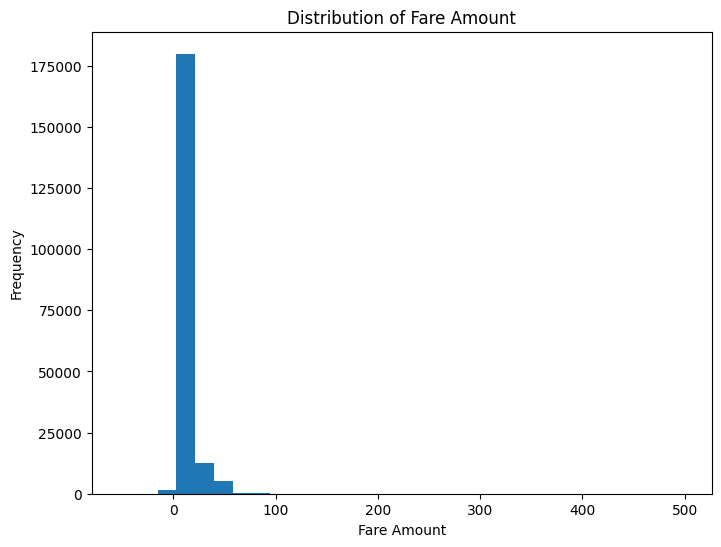

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(data['fare_amount'], bins=30)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.show()

#### Analyzing trips by date

In [11]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

data['pickup_date'] = data['pickup_datetime'].dt.date
data['pickup_time'] = data['pickup_datetime'].dt.time

In [12]:
trips_by_date = data['pickup_date'].value_counts().sort_index()
print(trips_by_date)

2009-01-01    63
2009-01-02    60
2009-01-03    84
2009-01-04    75
2009-01-05    64
              ..
2015-06-26    81
2015-06-27    75
2015-06-28    65
2015-06-29    63
2015-06-30    66
Name: pickup_date, Length: 2372, dtype: int64


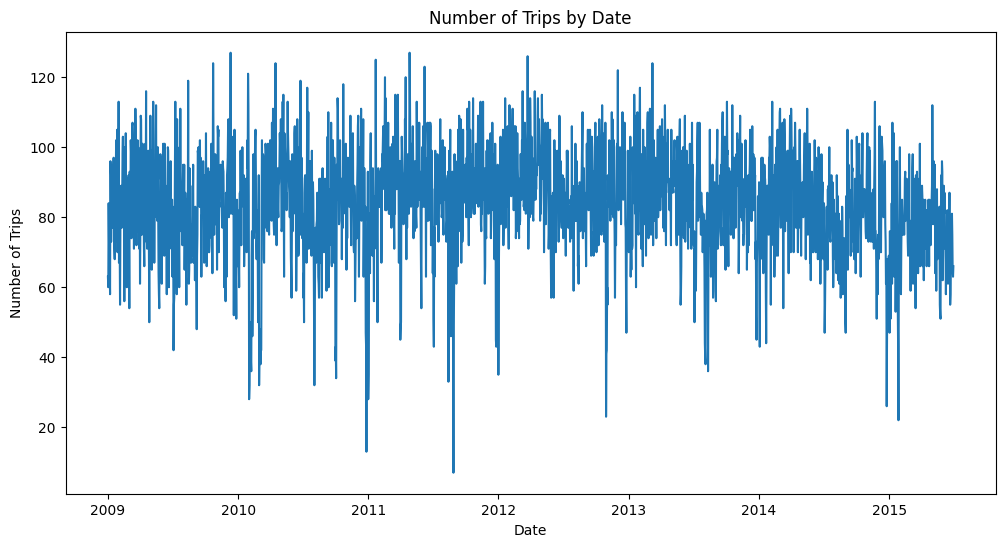

In [13]:
plt.figure(figsize=(12, 6))
trips_by_date.plot()
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Date')
plt.show()

#### Analyzing trips by hour



In [14]:
data['pickup_hour'] = data['pickup_datetime'].dt.hour
trips_by_hour = data['pickup_hour'].value_counts().sort_index()
print(trips_by_hour)

0      7844
1      5908
2      4422
3      3256
4      2365
5      1967
6      4139
7      7231
8      9075
9      9339
10     8944
11     9422
12     9924
13    10024
14     9749
15     9614
16     8313
17     9758
18    12072
19    12605
20    11755
21    11446
22    11023
23     9805
Name: pickup_hour, dtype: int64


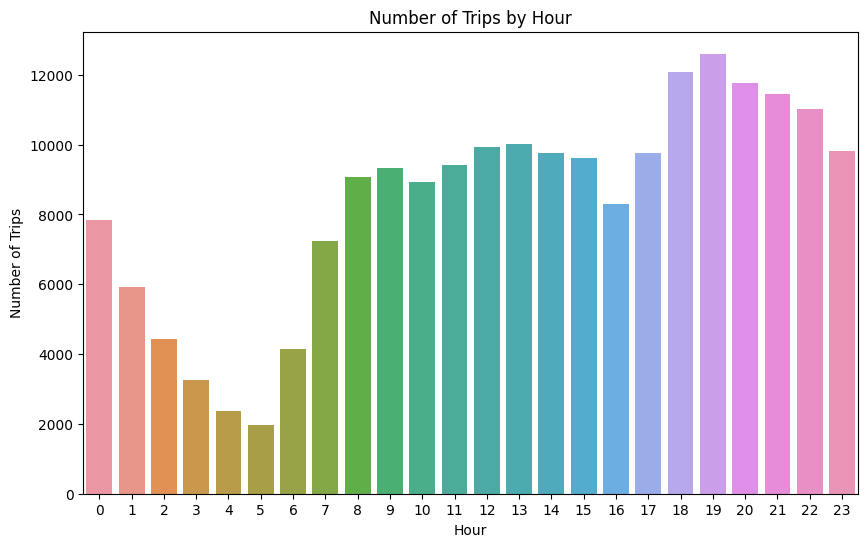

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=trips_by_hour.index, y=trips_by_hour.values)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour')
plt.show()

##### comparing pickup and dropoff longitude and lattitude

In [16]:
pickup_longitude_max = data['pickup_longitude'].max()
pickup_longitude_min = data['pickup_longitude'].min()

pickup_latitude_max = data['pickup_latitude'].max()
pickup_latitude_min = data['pickup_latitude'].min()

dropoff_longitude_max = data['dropoff_longitude'].max()
dropoff_longitude_min = data['dropoff_longitude'].min()

dropoff_latitude_max = data['dropoff_latitude'].max()
dropoff_latitude_min = data['dropoff_latitude'].min()

print("Pickup Longitude: Max =", pickup_longitude_max, "Min =", pickup_longitude_min)
print("Pickup Latitude: Max =", pickup_latitude_max, "Min =", pickup_latitude_min)
print("Dropoff Longitude: Max =", dropoff_longitude_max, "Min =", dropoff_longitude_min)
print("Dropoff Latitude: Max =", dropoff_latitude_max, "Min =", dropoff_latitude_min)

Pickup Longitude: Max = 57.418457 Min = -1340.64841
Pickup Latitude: Max = 1644.421482 Min = -74.01551500000001
Dropoff Longitude: Max = 1153.5726029999998 Min = -3356.6663
Dropoff Latitude: Max = 872.6976279999999 Min = -881.9855130000001


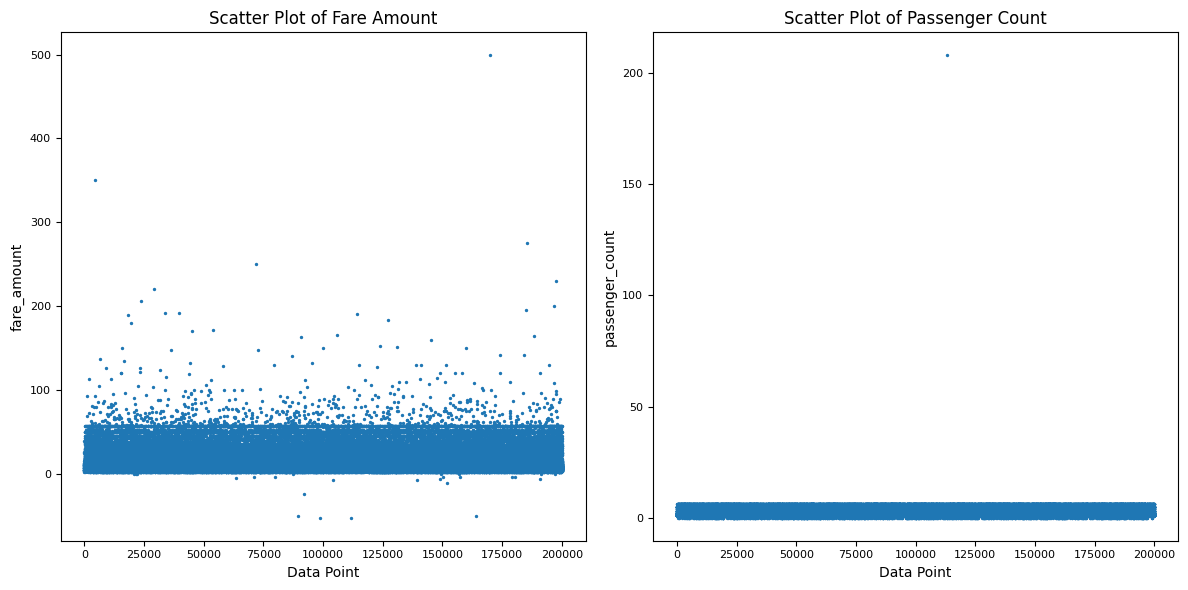

In [17]:
fare_amount = data['fare_amount']
passenger_count = data['passenger_count']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting the fare_amount
axes[0].scatter(range(len(fare_amount)), fare_amount, s=2)
axes[0].set_xlabel('Data Point')
axes[0].set_ylabel('fare_amount')
axes[0].set_title('Scatter Plot of Fare Amount')
axes[0].tick_params(labelsize=8)

# Plotting the passenger_count
axes[1].scatter(range(len(passenger_count)), passenger_count, s=2)
axes[1].set_xlabel('Data Point')
axes[1].set_ylabel('passenger_count')
axes[1].set_title('Scatter Plot of Passenger Count')
axes[1].tick_params(labelsize=8)

plt.tight_layout()
plt.show()

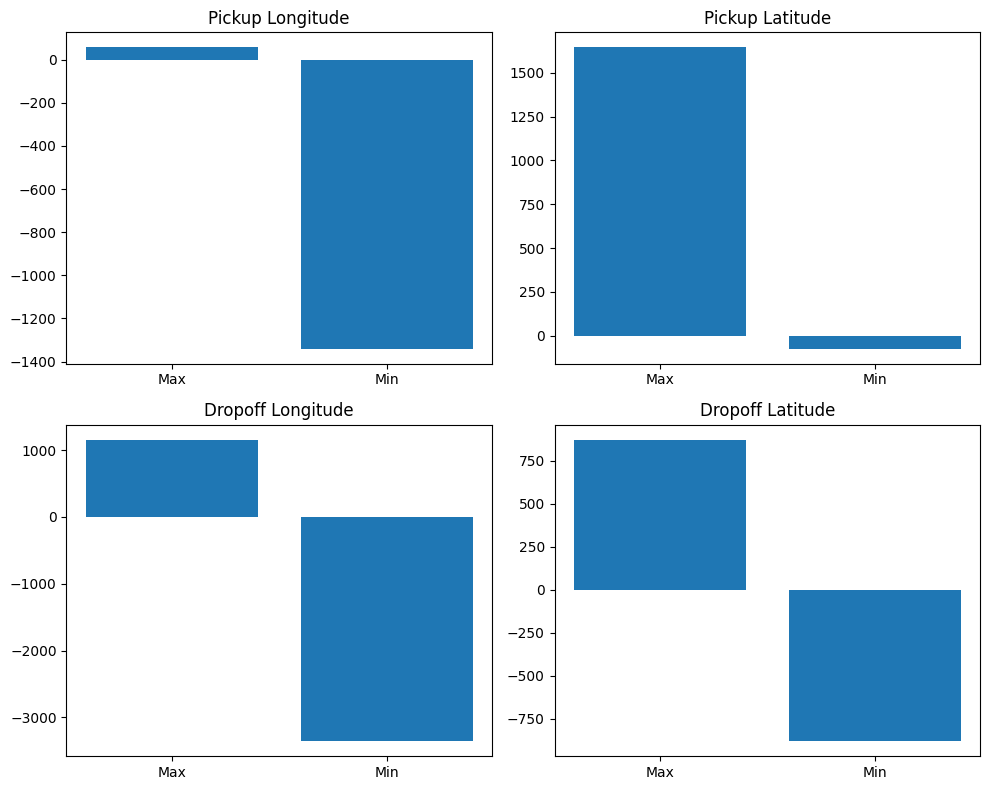

In [50]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plotting Pickup Longitude
axes[0, 0].bar(['Max', 'Min'], [pickup_longitude_max, pickup_longitude_min])
axes[0, 0].set_title('Pickup Longitude')

# Plotting Pickup Latitude
axes[0, 1].bar(['Max', 'Min'], [pickup_latitude_max, pickup_latitude_min])
axes[0, 1].set_title('Pickup Latitude')

# Plotting Dropoff Longitude
axes[1, 0].bar(['Max', 'Min'], [dropoff_longitude_max, dropoff_longitude_min])
axes[1, 0].set_title('Dropoff Longitude')

# Plotting Dropoff Latitude
axes[1, 1].bar(['Max', 'Min'], [dropoff_latitude_max, dropoff_latitude_min])
axes[1, 1].set_title('Dropoff Latitude')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
data = data.assign(hour = data.pickup_datetime.dt.hour,
               day = data.pickup_datetime.dt.day,
               month = data.pickup_datetime.dt.month,
               year = data.pickup_datetime.dt.year,
               dayofweek = data.pickup_datetime.dt.dayofweek)
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,pickup_hour,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,19,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,20,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,21,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,8,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,17,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,10:49:00,10,10,28,10,2012,6
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,01:09:00,1,1,14,3,2014,4
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,00:42:00,0,0,29,6,2009,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,14:56:25,14,14,20,5,2015,2


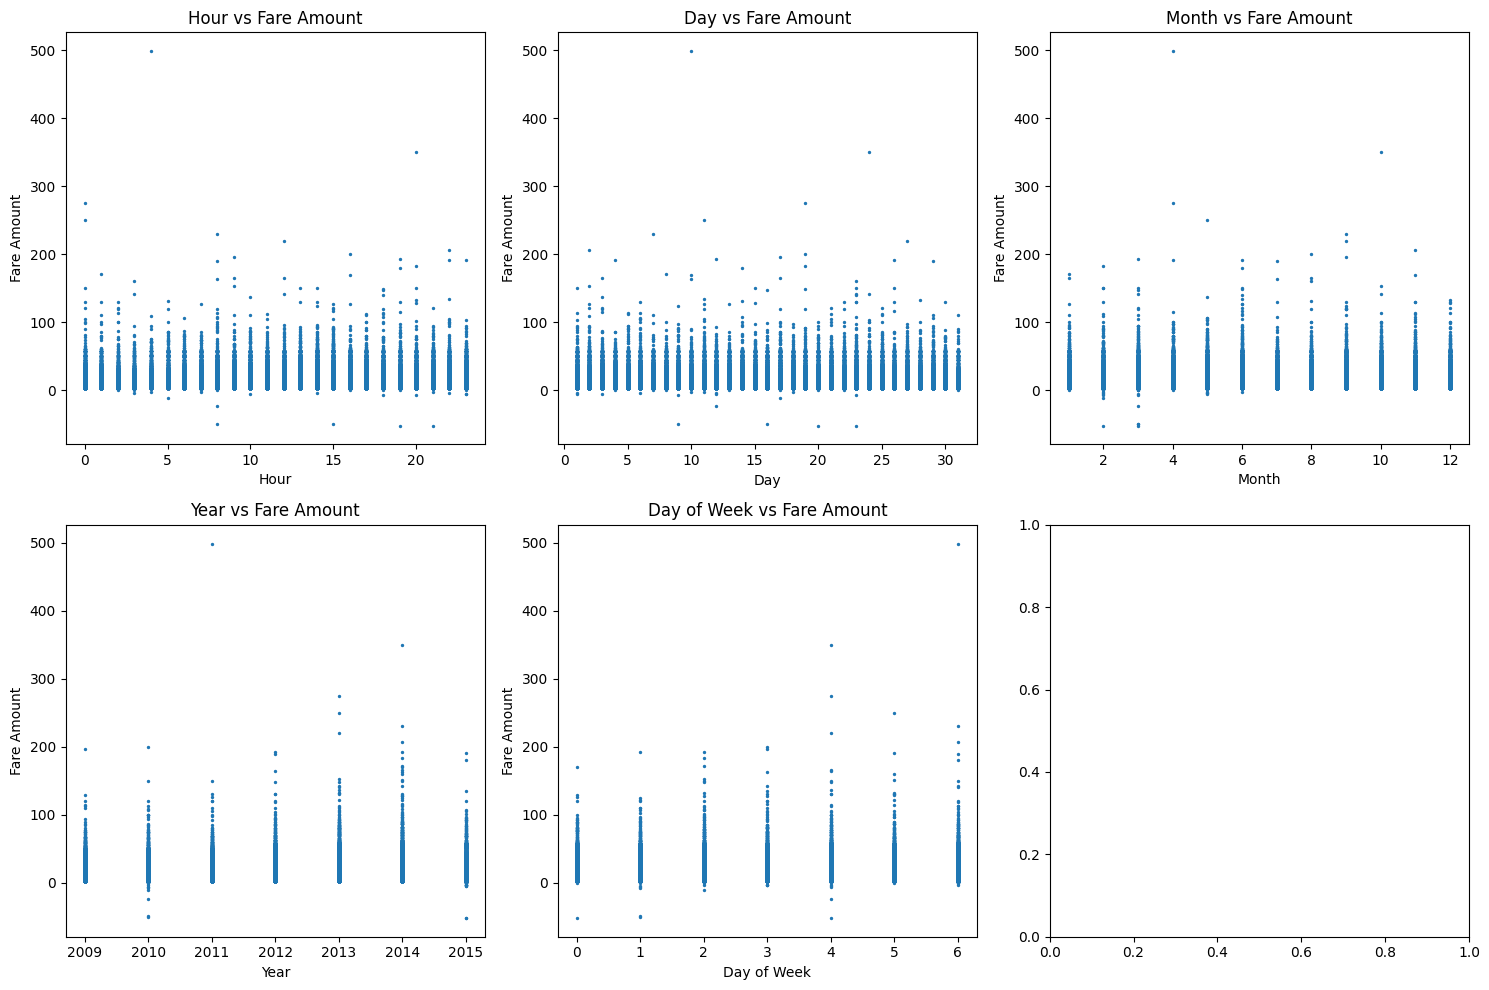

In [51]:

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plotting scatter subplots
axes[0, 0].scatter(data['hour'], data['fare_amount'], s=2)
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Fare Amount')
axes[0, 0].set_title('Hour vs Fare Amount')

axes[0, 1].scatter(data['day'], data['fare_amount'], s=2)
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Fare Amount')
axes[0, 1].set_title('Day vs Fare Amount')

axes[0, 2].scatter(data['month'], data['fare_amount'], s=2)
axes[0, 2].set_xlabel('Month')
axes[0, 2].set_ylabel('Fare Amount')
axes[0, 2].set_title('Month vs Fare Amount')

axes[1, 0].scatter(data['year'], data['fare_amount'], s=2)
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Fare Amount')
axes[1, 0].set_title('Year vs Fare Amount')

axes[1, 1].scatter(data['dayofweek'], data['fare_amount'], s=2)
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Fare Amount')
axes[1, 1].set_title('Day of Week vs Fare Amount')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


#### These scatter subplots provide visualizations of the relationship between each variable (hour, day, month, year, dayofweek) and the fare_amount in the 'data' DataFrame.

In [19]:
# The Haversine formula is a mathematical equation that calculates the 
# distance between two points on a sphere (such as the Earth) given 
# their longitude and latitude coordinates.

def haversine(lon1, lon2, lat1, lat2):
    # Conversion to radians
    lon1, lon2, lat1, lat2 = map(np.radians, [lon1, lon2, lat1, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c

    return km

In [20]:
data['dist_travel_km'] = haversine(data['pickup_longitude'], data['dropoff_longitude'], data['pickup_latitude'], data['dropoff_latitude'])
data['dist_travel_km'].head()

0    1.683323
1    2.457590
2    5.036377
3    1.661683
4    4.475450
Name: dist_travel_km, dtype: float64

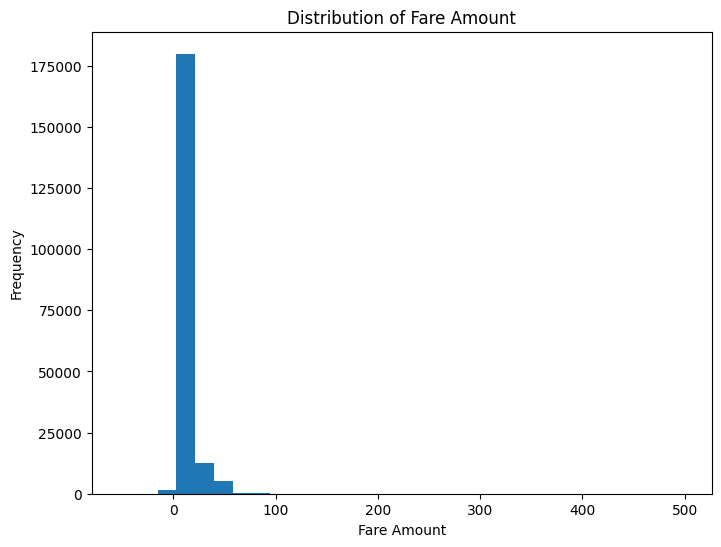

In [21]:
data['fare_amount'] = pd.to_numeric(data['fare_amount'], errors='coerce')
data['passenger_count'] = pd.to_numeric(data['passenger_count'], errors='coerce')

fare_amount = data['fare_amount'].dropna()
passenger_count = data['passenger_count'].dropna()

# Histogram of fare_amount
plt.figure(figsize=(8, 6))
plt.hist(fare_amount, bins=30)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.show()

In [22]:
#Function to find the correlation
corr = data.corr() 
corr

/tmp/ipykernel_469/3415484353.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.010457,-0.008481,0.008985,-0.011014,0.010150,-0.021473,-0.021473,0.001374,0.023814,0.118335,0.007501,0.024685
pickup_longitude,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414,0.002433,0.002433,0.005184,-0.004665,0.009966,0.000825,0.105581
pickup_latitude,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560,-0.003822,-0.003822,-0.008264,0.004625,-0.010233,-0.002455,-0.062436
dropoff_longitude,0.008985,0.833026,-0.774787,1.000000,-0.917010,0.000034,0.003478,0.003478,0.005056,-0.003606,0.008467,0.000002,0.056717
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659,-0.002544,-0.002544,-0.007835,0.003818,-0.011239,-0.002335,-0.079944
passenger_count,0.010150,-0.000414,-0.001560,0.000034,-0.000659,1.000000,0.013196,0.013196,0.003252,0.009773,0.004798,0.033196,-0.001473
pickup_hour,-0.021473,0.002433,-0.003822,0.003478,-0.002544,0.013196,1.000000,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.000640
hour,-0.021473,0.002433,-0.003822,0.003478,-0.002544,0.013196,1.000000,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.000640
day,0.001374,0.005184,-0.008264,0.005056,-0.007835,0.003252,0.004677,0.004677,1.000000,-0.017360,-0.012170,0.005617,-0.002115
month,0.023814,-0.004665,0.004625,-0.003606,0.003818,0.009773,-0.003926,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,-0.000633


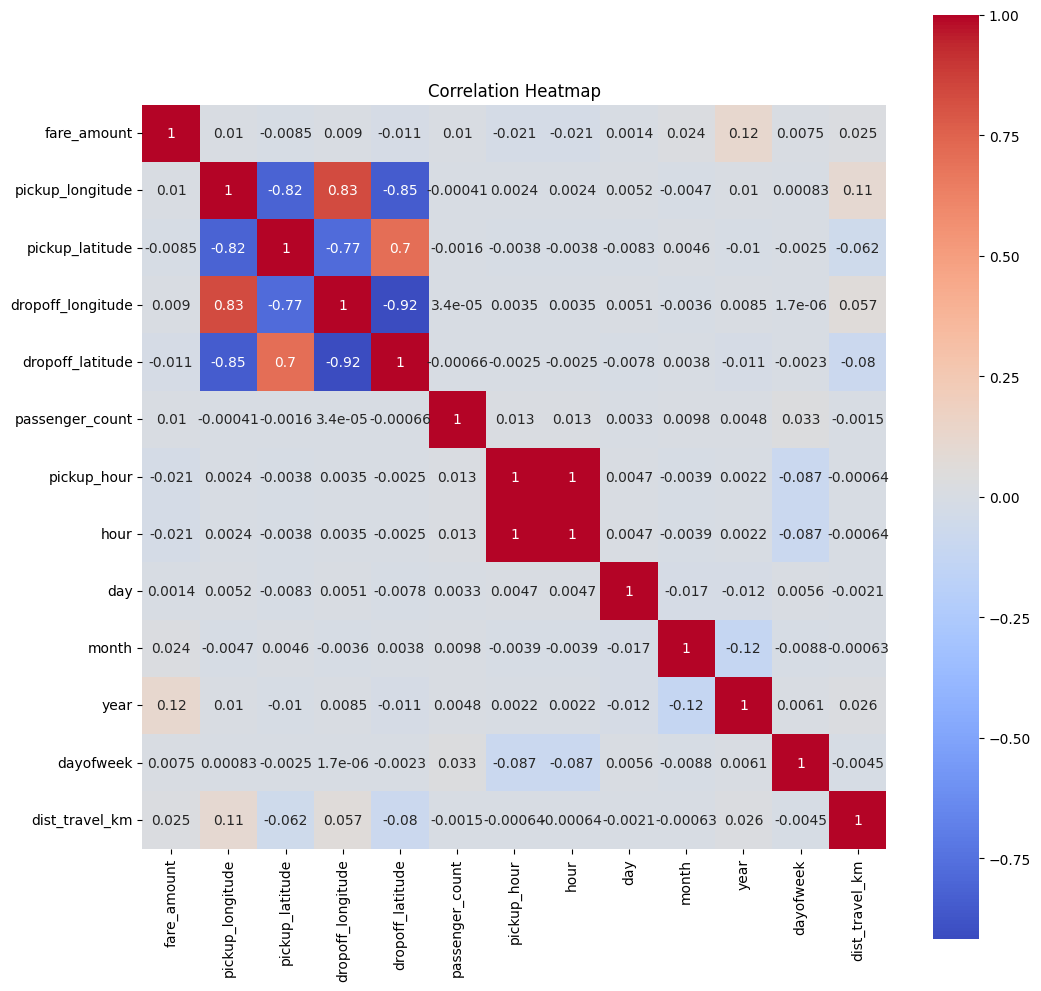

In [23]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)

# Add title and display the heatmap
plt.title('Correlation Heatmap')
plt.show()

### Model Training

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [25]:
# Dividing: features and targets
X = data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
y = data['fare_amount']

In [26]:
print(X)
print(y)

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.999817        40.738354         -73.999512   
1             -73.994355        40.728225         -73.994710   
2             -74.005043        40.740770         -73.962565   
3             -73.976124        40.790844         -73.965316   
4             -73.925023        40.744085         -73.973082   
...                  ...              ...                ...   
199995        -73.987042        40.739367         -73.986525   
199996        -73.984722        40.736837         -74.006672   
199997        -73.986017        40.756487         -73.858957   
199998        -73.997124        40.725452         -73.983215   
199999        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  \
0              40.723217                1    19    7      5  2015          3   
1              40.750325                1    20   17      7  2009      

#### Splitting the data into train and test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Trainig using three models 

In [39]:
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)


LinearRegression()

In [40]:
# Decision Tree 
decision_tree_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=2)
decision_tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5)

In [41]:
# Random Forest
forest_reg = RandomForestRegressor(n_estimators=100,max_depth = 5,min_samples_split=2)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

#### Predicting the target variable for the test data using each model:

In [42]:
linear_pred = linear_regressor.predict(X_test)
tree_pred = decision_tree_regressor.predict(X_test)
forest_pred = forest_reg.predict(X_test)

In [49]:
# linear_pred

array([12.96497036, 12.18037778, 10.28038756, ..., 12.83209265,
       11.03051971, 12.8694896 ])

#### Evaluation of the performance of each model using mse,rmse, r_squared error

In [43]:
linear_mse = mean_squared_error(y_test, linear_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
forest_mse = mean_squared_error(y_test, forest_pred)

In [44]:
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
print("Linear Regression RMSE:", linear_rmse)

# Calculate RMSE for Decision Tree Regression
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_pred))
print("Decision Tree Regression RMSE:", tree_rmse)

# Calculate RMSE for Random Forest Regression
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
print("Random Forest Regression RMSE:", forest_rmse)

Linear Regression RMSE: 10.224882338215469
Decision Tree Regression RMSE: 5.7889214717188
Random Forest Regression RMSE: 5.701472963844935


In [45]:

# Calculate R-squared for Linear Regression
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression R-squared:", linear_r2)

# Calculate R-squared for Decision Tree Regression
tree_r2 = r2_score(y_test, tree_pred)
print("Decision Tree Regression R-squared:", tree_r2)

# Calculate R-squared for Random Forest Regression
forest_r2 = r2_score(y_test, forest_pred)
print("Random Forest Regression R-squared:", forest_r2)

Linear Regression R-squared: 0.016674004747834537
Decision Tree Regression R-squared: 0.6848072650109618
Random Forest Regression R-squared: 0.6942580573989481


In [46]:
cols = ['Model', 'RMSE', 'R-Squared']
result_tabulation = pd.DataFrame(columns = cols)

In [47]:
# Calculate RMSE and R-squared for Linear Regression
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
linear_r2 = r2_score(y_test, linear_pred)
result_tabulation = result_tabulation.append({'Model': 'Linear Regression', 'RMSE': linear_rmse, 'R-Squared': linear_r2}, ignore_index=True)

# Calculate RMSE and R-squared for Decision Tree Regression
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_pred))
tree_r2 = r2_score(y_test, tree_pred)
result_tabulation = result_tabulation.append({'Model': 'Decision Tree Regression', 'RMSE': tree_rmse, 'R-Squared': tree_r2}, ignore_index=True)

# Calculate RMSE and R-squared for Random Forest Regression
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
forest_r2 = r2_score(y_test, forest_pred)
result_tabulation = result_tabulation.append({'Model': 'Random Forest Regression', 'RMSE': forest_rmse, 'R-Squared': forest_r2}, ignore_index=True)

/tmp/ipykernel_469/3839980661.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append({'Model': 'Linear Regression', 'RMSE': linear_rmse, 'R-Squared': linear_r2}, ignore_index=True)
/tmp/ipykernel_469/3839980661.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append({'Model': 'Decision Tree Regression', 'RMSE': tree_rmse, 'R-Squared': tree_r2}, ignore_index=True)
/tmp/ipykernel_469/3839980661.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append({'Model': 'Random Forest Regression', 'RMSE': forest_rmse, 'R-Squared': forest_r2}, ignore_index=True)


In [48]:
# Print the tabulated results
print(result_tabulation)

                      Model       RMSE  R-Squared
0         Linear Regression  10.224882   0.016674
1  Decision Tree Regression   5.788921   0.684807
2  Random Forest Regression   5.701473   0.694258
